<a href="https://colab.research.google.com/github/palanithanarajk/model_cmb/blob/master/cell_medullo_train_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Child Medulloblastoma detection from microscopic blood smear images

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [68]:
import cv2 
import os
from sklearn.feature_extraction import image

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
from tqdm import tqdm
X=[]
Z=[]
IMG_SIZE=256
norm_DIR='/content/gdrive/My Drive/rajudl/cmb_child/data/normal' # change the path to point the data folder

mal_DIR='/content/gdrive/My Drive/rajudl/cmb_child/data/cmb' # change the path to point the data folder

In [72]:

def assign_label(img,ret_type):
    return ret_type

def make_train_data(ret_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,ret_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [73]:

make_train_data('Uninfected',norm_DIR)
print(len(X))

make_train_data('CMB',mal_DIR)
print(len(X))

  1%|▏         | 2/154 [00:00<00:13, 11.20it/s]

50


100%|██████████| 154/154 [00:12<00:00, 12.04it/s]

204


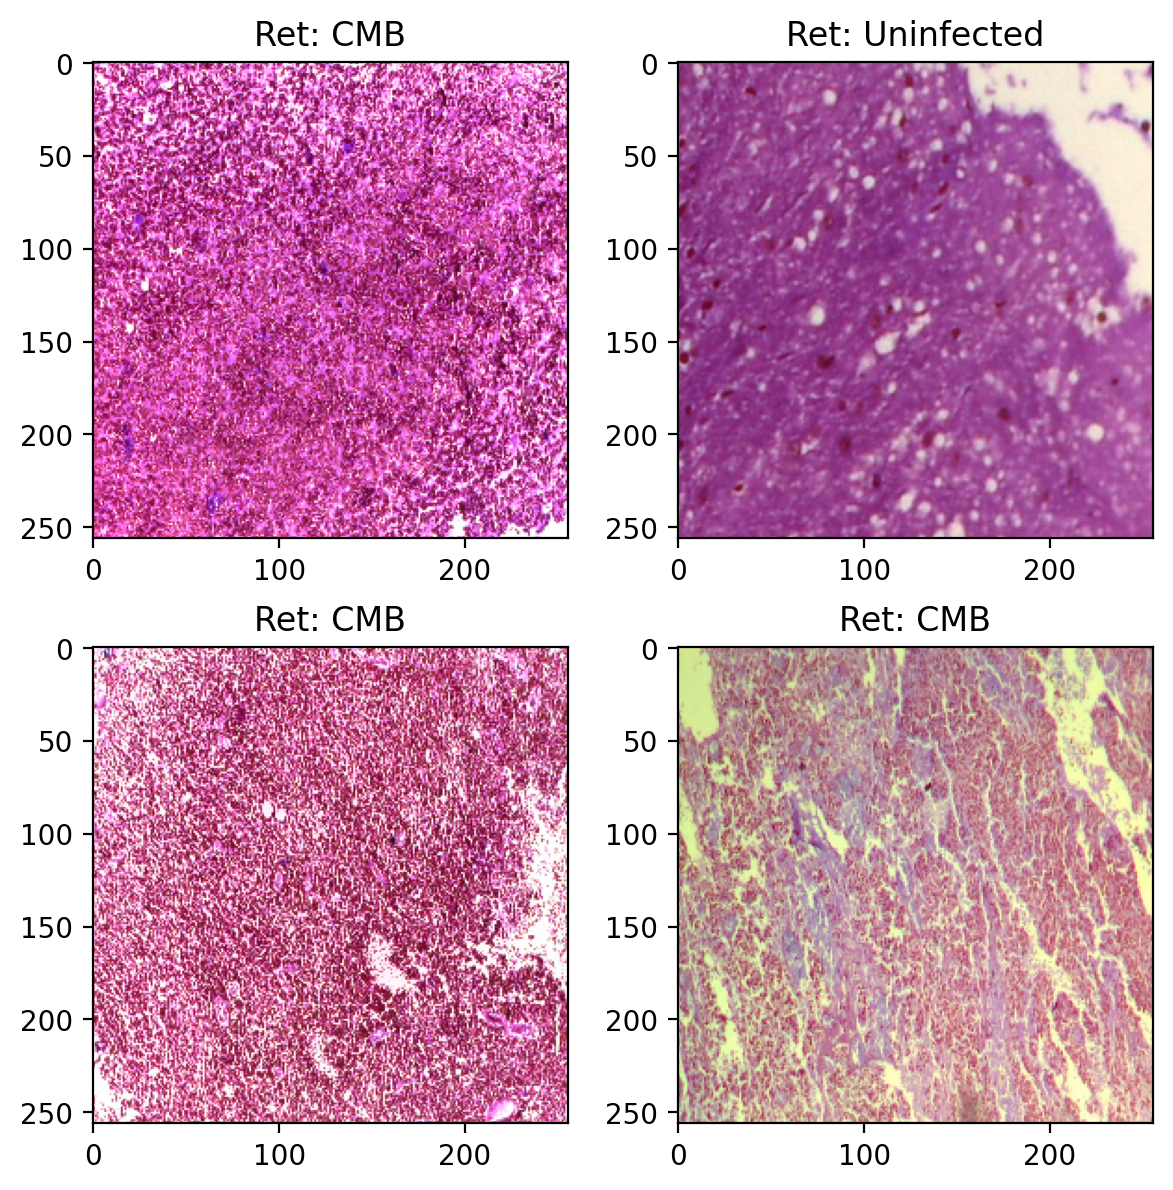

In [74]:
import random as rn
fig,ax=plt.subplots(2,2)
fig.set_size_inches(6,6)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Ret: '+Z[l])
        plt.tight_layout()

In [75]:

from sklearn.preprocessing import LabelEncoder
import tensorflow 
from tensorflow.keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(153, 256, 256, 3)
(153, 2)
(51, 256, 256, 3)
(51, 2)


In [77]:
from tensorflow.keras.models import Sequential
import tensorflow as tf


In [78]:
#modelling starts using a CNN.
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(tf.keras.layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(2, activation = "softmax"))

In [79]:
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 96)        55392     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 96)       

In [80]:

print('# Fit model on training data')
# # fits the model on batches with real-time data augmentation:
# history=model.fit(x_train, y_train, batch_size=32,
#           steps_per_epoch=len(x_train) / 32, epochs=20,validation_data=(x_test, y_test))

history = model.fit(x_train, y_train,
                    batch_size=8,
                    epochs=30,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_test, y_test))

# Fit model on training data
Epoch 1/30
20/20 [==============================] - 1s 35ms/step - loss: 0.6693 - accuracy: 0.6421 - val_loss: 0.2154 - val_accuracy: 0.8824
Epoch 2/30
20/20 [==============================] - 0s 24ms/step - loss: 0.1333 - accuracy: 0.9733 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 3/30
20/20 [==============================] - 0s 24ms/step - loss: 0.0842 - accuracy: 0.9830 - val_loss: 0.3052 - val_accuracy: 0.9020
Epoch 4/30
20/20 [==============================] - 0s 23ms/step - loss: 0.2063 - accuracy: 0.8974 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 5/30
20/20 [==============================] - 0s 23ms/step - loss: 0.0344 - accuracy: 0.9917 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 6/30
20/20 [==============================] - 0s 23ms/step - loss: 0.3797 - accuracy: 0.9090 - val_loss: 0.1074 - val_accuracy: 0.9608
Epoch 7/30
20/20 [==============================] - 0s 23ms/step - loss: 0.0499 - accuracy: 0.9927 - val_loss: 0.0092 - val_a

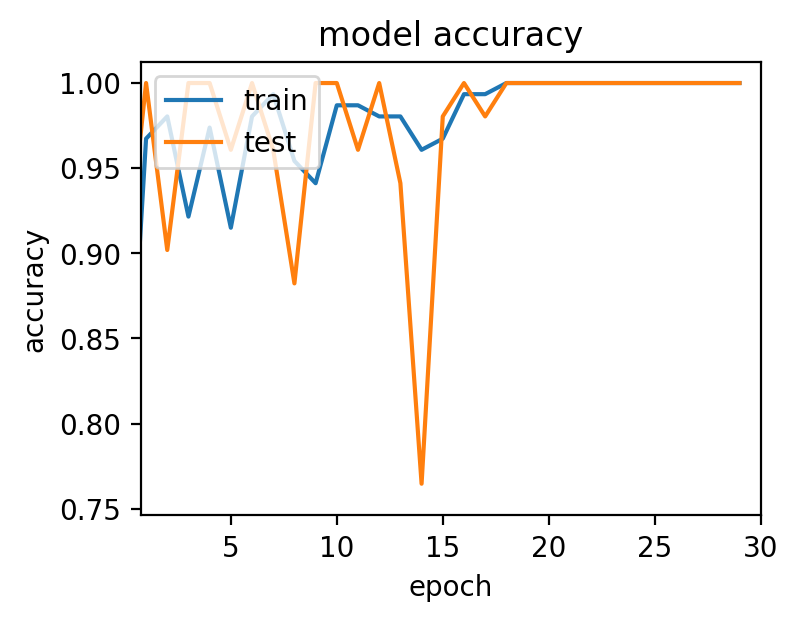

In [81]:

# summarize history for accuracy
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4,3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xlim([min(plt.ylim()),30])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

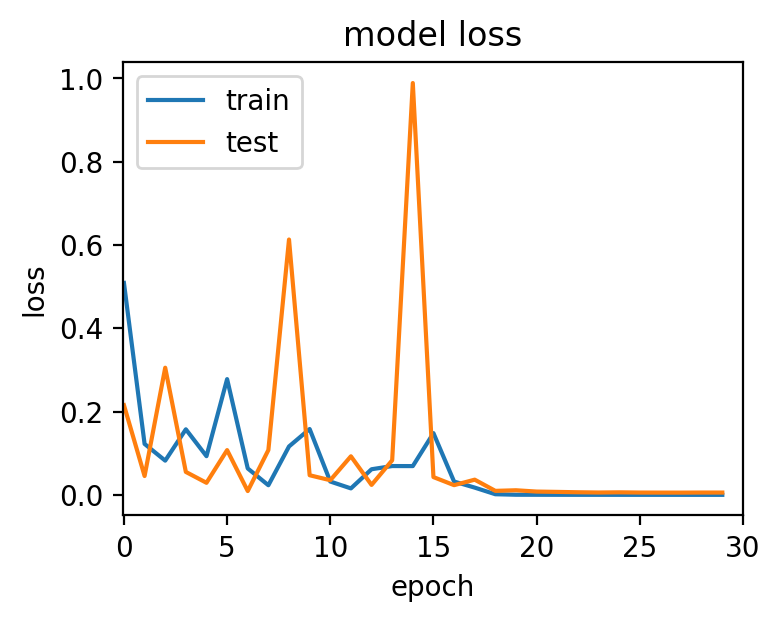

In [87]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.rcParams["figure.figsize"] = (4,3)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xlim([min(plt.ylim()),30])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [83]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes=np.argmax(y_test,axis=1)

In [84]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
print('Accuracy for CMB disease classifier=',metrics.accuracy_score(predicted_classes,true_classes))
print('Confusion matrix=\n',confusion_matrix(true_classes, predicted_classes))

Accuracy for CMB disease classifier= 1.0
Confusion matrix=
 [[41  0]
 [ 0 10]]


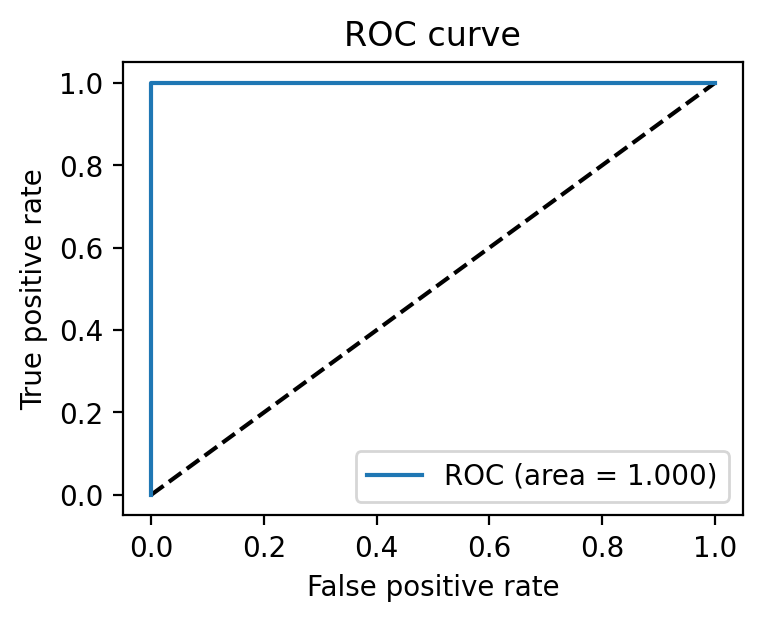

In [85]:

from sklearn.metrics import roc_curve, auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_classes, predictions[:,1])
auc_rf = auc(fpr_keras, tpr_keras)
plt.rcParams["figure.figsize"] = (4,3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ROC (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [88]:
# Save model
from keras.models import load_model

model.save('cmb_model.h5')  # creates a HDF5 file 'my_model.h5'

In [103]:
!mkdir tfjs_model
!ls

cmb_model.h5  gdrive  sample_data  tfjs_model


In [111]:
# Convert to tensorflow.js model for deploying in a website
!tensorflowjs_converter --input_format=keras cmb_model.h5 /tfjs_model

2020-12-26 12:47:10.723305: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
